In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
# 1. Load the Data
data = pd.read_csv('/home/fymsc15/Aditya_WF/AIML/Assignment04/Tennis.csv') 

In [4]:
# 2. Data Preprocessing
data.columns = data.columns.astype(str).str.replace('\xa0', ' ') #cleaning the column names of the DataFrame

X = data.drop('Play Tennis', axis=1) #Drops the column named
y = data['Play Tennis'] #Selects the 'Play column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splits the dataset

label_encoders_X = {}
for column in X.columns:
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        X_train[column] = le.transform(X_train[column])
        X_test[column] = le.transform(X_test[column])
        label_encoders_X[column] = le

le_y = LabelEncoder()
y = le_y.fit_transform(y)
y_train = le_y.transform(y_train)
y_test = le_y.transform(y_test)

# 3. Create and Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy')#initializes a Decision Tree 
dt_classifier.fit(X_train, y_train)

# 4. Make Predictions
y_pred = dt_classifier.predict(X_test)

# 5. Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.6666666666666666
Confusion Matrix:
[[0 1]
 [0 2]]


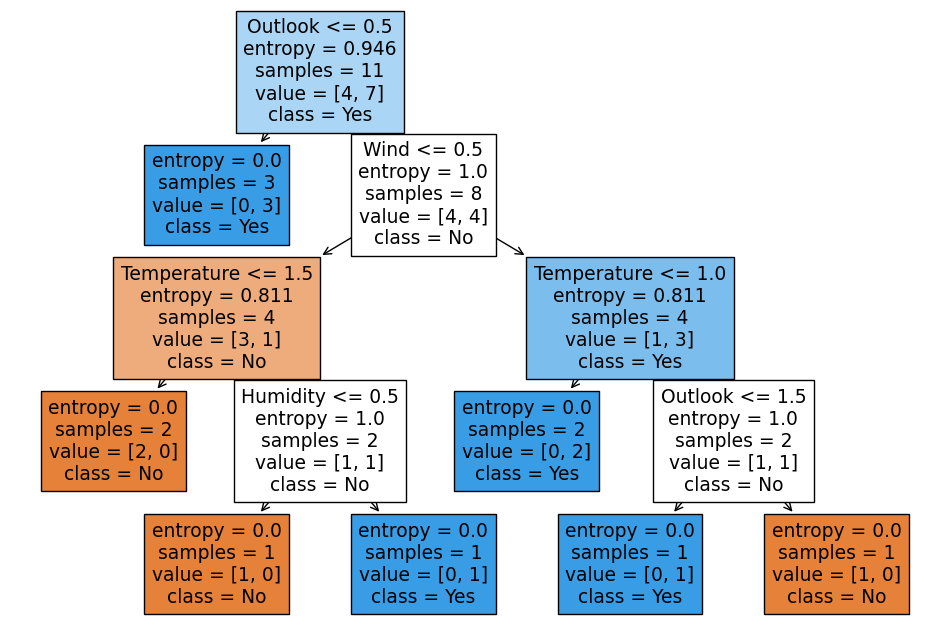


Prediction for new data: No


In [6]:
# 6. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier,
              feature_names=X.columns,
              class_names=['No', 'Yes'],
              filled=True)

plt.savefig("decision_tree.png")

plt.show() # Display the figure


# --- Making Predictions on New Data ---
new_data = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Hot'],
    'Humidity': ['High'],
    'Wind': ['Strong']
})

for column, le in label_encoders_X.items():
    if column in new_data.columns:
        new_data[column] = le.transform(new_data[column])

prediction = dt_classifier.predict(new_data)
decoded_prediction = le_y.inverse_transform(prediction)
print(f"\nPrediction for new data: {decoded_prediction[0]}")